In [1]:
%load_ext autoreload
%autoreload 2

from tweedejaars_project import load_df, get_splits
import pandas as pd
from sklearn.ensemble import *
from sklearn.metrics import *

df = load_df()

2024-06-07 11:46:39.826 | INFO     | tweedejaars_project.config:<module>:11 - PROJ_ROOT path is: /home/nub/tweedejaars_project


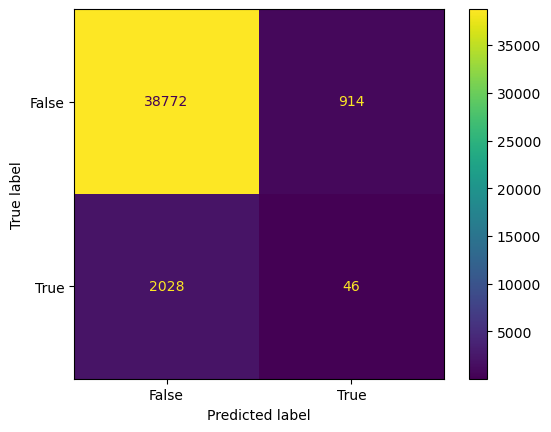

In [2]:
splits = get_splits(df, ['PTU', 'import_capacity'])
m = ExtraTreesClassifier()
m.fit(*splits['train'])
p = m.predict(splits['valid'][0])
ConfusionMatrixDisplay.from_predictions(splits['valid'][1], p)


In [3]:
df['fake_ptu'] = (df['ptu_id'] + 4) % 96 + 1
df['check'] = df['PTU'] == df['fake_ptu'] 
print(df['check'].all())
temp = df[133900:] # 133979 zomertijd jumpt van 8 naar 13

False


In [4]:
# Calculate the time difference between consecutive rows
df['time_diff'] = df['datetime'].diff()

# Check if all time differences are equal to one minute
is_every_minute = (df['time_diff'] == pd.Timedelta(minutes=1))[1:].all()
is_every_minute

True